In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


# Exploratory Data Analysis

In [6]:
##missing values
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
#statstical information about given data
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [8]:
df[df['release_year'] == 2003] #mean value is "2003"

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
295,s296,Movie,Cheaper By the Dozen,Shawn Levy,"Steve Martin, Bonnie Hunt, Hilary Duff, Tom We...",United States,"February 19, 2021",2003,PG,99 min,"Comedy, Family",Tom and Kate Baker discover that managing twel...
396,s397,Movie,X2,Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, H...","Canada, United States","October 9, 2020",2003,PG-13,134 min,"Action-Adventure, Family, Science Fiction","X-Men newcomer, Night Crawler, joins Magneto t..."
640,s641,Movie,Destino,Monfery Dominique,Dora Luz,"France, United States","January 10, 2020",2003,PG,6 min,"Animation, Family, Romance",A collaboration begun in 1945 by Salvador Dalí...
665,s666,Movie,Holes,Andrew Davis,"Sigourney Weaver, Jon Voight, Patricia Arquett...",United States,"January 1, 2020",2003,PG,119 min,"Coming of Age, Drama, Family",The Yelnats family curse lands young Stanley a...
677,s678,Movie,George of the Jungle 2,David Grossman,"Thomas Church, Julie Benz, Christina Pickles, ...","United States, Australia","December 20, 2019",2003,PG,89 min,"Action-Adventure, Comedy, Family","George must rescue his family, then save the j..."
709,s710,Movie,101 Dalmatians II: Patch's London Adventure,"Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",United States,"November 12, 2019",2003,G,77 min,"Action-Adventure, Animation",Pongo and Perdita's pup Patch gets the chance ...
732,s733,Movie,Atlantis: Milo's Return,"Tad Stones, Toby Shelton, Victor Cook","James Taylor, Cree Summer, John Mahoney, Jacqu...",United States,"November 12, 2019",2003,G,83 min,"Action-Adventure, Animation, Family",Explorers emerge from below the sea to solve t...
764,s765,Movie,Brother Bear,"Aaron Blaise, Robert Walker","Joaquin Phoenix, Jeremy Suarez, Jason Raize, R...",United States,"November 12, 2019",2003,G,90 min,"Action-Adventure, Animation, Family",A boy transformed into a bear makes an epic jo...
874,s875,Movie,Eddie's Million Dollar Cook-off,Paul Hoen,"Taylor Ball, Orlando Brown, Reiley McClendon, ...",United States,"November 12, 2019",2003,TV-G,86 min,"Comedy, Coming of Age, Sports",A baseball prodigy swings for the culinary fen...
889,s890,Movie,Finding Nemo,Andrew Stanton,"Albert Brooks, Ellen DeGeneres, Alexander Goul...","United States, Australia","November 12, 2019",2003,G,103 min,"Action-Adventure, Animation, Comedy",Marlin makes an epic journey to bring Nemo hom...


In [9]:
##Data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
##Analysis of "type of the movie"
df['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

In [11]:
values = df['type'].value_counts()
keys = df['type'].unique()

fig = go.Figure(go.Pie(values= values, labels = keys, hole = 0.3))
fig.show()

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], format = "%B %d, %Y")

In [13]:
#extract month and date added

df['month'] = df['date_added'].dt.month.fillna(0)

<AxesSubplot:>

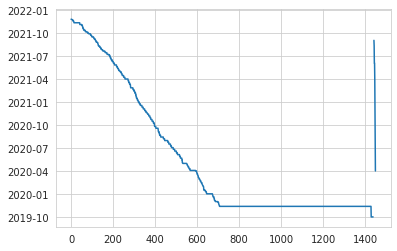

In [14]:
df['date_added'].plot()

In [15]:
fig = px.histogram(data_frame=df, x = 'date_added', title="Date")
fig.show()

<AxesSubplot:ylabel='Frequency'>

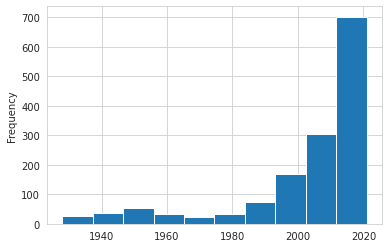

In [16]:
df['release_year'].plot(kind = 'hist')

In [17]:
fig = px.histogram(df['release_year'], color = df['month'], nbins = 100, title="Release Year")
fig.show()

In [18]:
df['country'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,United States,United Kingdom,None,None,None,None,None,None,None,None,None,None,None,None,None
1446,United States,Canada,None,None,None,None,None,None,None,None,None,None,None,None,None
1447,United Kingdom,Germany,United States,None,None,None,None,None,None,None,None,None,None,None,None
1448,United Kingdom,Germany,United States,None,None,None,None,None,None,None,None,None,None,None,None


In [19]:
country_count = df.copy()
country_count = pd.concat([country_count, df['country'].str.split(',', expand=True)])
country_count = country_count.melt(id_vars = ['type', 'title'], value_vars = range(15), value_name = 'country')
country_count = country_count[country_count['country'].notna()]
#country_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



In [20]:
fig = px.histogram(data_frame=country_count, x = 'country', title="Country count").update_xaxes(categoryorder='total descending')
fig.show()

In [21]:
##Analysis of ratings

df['rating'].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

In [22]:
fig = px.bar(data_frame= df, x = 'rating', title="Ratings of the Movies and TV-shows")
fig.show()

In [23]:
fig = px.histogram(data_frame=df, x = ['rating'], color = 'type', title="Ratings of the Movies and TV-shows")
fig.show()

In [24]:
df['listed_in'].str.split(',', expand=True)

,0,1,2
0,Animation,Family,None
1,Comedy,None,None
2,Animation,Comedy,Family
3,Musical,None,None
4,Docuseries,Historical,Music
...,...,...,...
1445,Action-Adventure,Family,Science Fiction
1446,Action-Adventure,Comedy,Family
1447,Biographical,Comedy,Drama
1448,Buddy,Comedy,Coming of Age


In [25]:
genre_count = df.copy()
genre_count = pd.concat([genre_count, df['listed_in'].str.split(',', expand=True)])
genre_count = genre_count.melt(id_vars = ['type', 'title'], value_vars = range(3), value_name = 'genre')
genre_count = genre_count[genre_count['genre'].notna()]

In [26]:
fig = px.histogram(data_frame= genre_count, x = ['genre'], title="Genre of the Movies")
fig.show()

In [27]:
keys = df['director'].value_counts().keys().to_list()
values = df['director'].value_counts().to_list()

fig = px.bar(x = keys[:30], y = values[:30], data_frame = df, 
             title="Top 30 Directors", 
             labels={'x': 'Directors', 'y': 'no of movies'})
fig.show()